# Overview, Understanding of Data and Business Question.

Customer churn, or Exited in this project, occurs when customers stop doing business with a company. The companies are interested in identifying segments of these customers because the price for acquiring a new customer is usually higher than retaining the old one. Banks are a good example of this companies. If banks know how they customers leave their account, they could prevent it by special offers to keep their clients. What will help businesses to keep their customers is making a model using past data to predict the number of churn or exited customers. 

I am going to use classification algorithms to make model to predict customer’s behavior and prevent them from abandoning bank's service.
What my model does is predicting higher number of class 0 which is Not Exited customers and keep lower the number of class 1 which is Exited customers as well as keep as low as possible the number of False Negative.

Fales Negative is the number of Exited customers who predicted not Exited and False Positive is the number of stayed customers who predicted exited. This would be a misleading for a company which tries to have the best predict of its customers. To do So, I will use f1 score as my metric to make my model. Also, I will use ROC (Receiver Operating Characteristic) curve to show performance over a range of trade-offs between true positive (TP) and false positive (FP) error rates.

I work with dataset from Kaggle which has Information of 10000 bank's customers from three countries France, Germany and Spain. Some of features in this dataset such as Age, Balance, Gender and regions of banks are the most correlated with Exited column which is the target of my prediction. I will use those features for visualization and recommendations.

Here in this project, I will help stakeholders of this bank to find the causes of churned customers and keep their clients.


-----

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score, plot_roc_curve
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

from operator import itemgetter, attrgetter

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import missingno

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import os
import sys
ex_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if ex_path not in sys.path:
    sys.path.append(ex_path)

from src.helper_functions import *


------

# Import data
- Download data from Kaggle [Churn Modeling](https://www.kaggle.com/shivan118/churn-modeling-dataset)
- Upload data into data folder inside the repository.
- Data is a 668.81 KB zip file which can be unzipped from terminal. The best way to do is change the directory in terminal to where data will store, use unzip command following by uploaded data folder.
- The unzipped data is a single csv file which is ready to use.

### import data as csv file form data folder

In [3]:
df_churn = pd.read_csv('../../data/Churn_Modelling.csv')

In [4]:
# checking the head of dataset 
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


----

# EDA

In [5]:
# getting info of dataset
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Data Explanation 

- RowNumber: Numerical column
- CustomerId: Numerical column 
- Surname: Categorical column name of customers
- CreditScore: Numerical column 
- Geography: Categorical column region of three banks in Europe countries France, Germany and Spain.
- Gender: Categorical column Gender where Male=0 and Female=1
- Age: Numerical column 
- Tenure: Numerical column
- Balance: Numerical column
- NumOfProducts: Numerical column 
- HasCrCard: Numerical column 
- IsActiveMember: Numerical column 
- EstimatedSalary: Numerical column 
- Exited: Numerical column which is the target for my prediction. This column is a binary where 0 is Stayed or Not churn and 1 Churned customers.

### Using hitmap to show the correlation between numerical columns and the target 

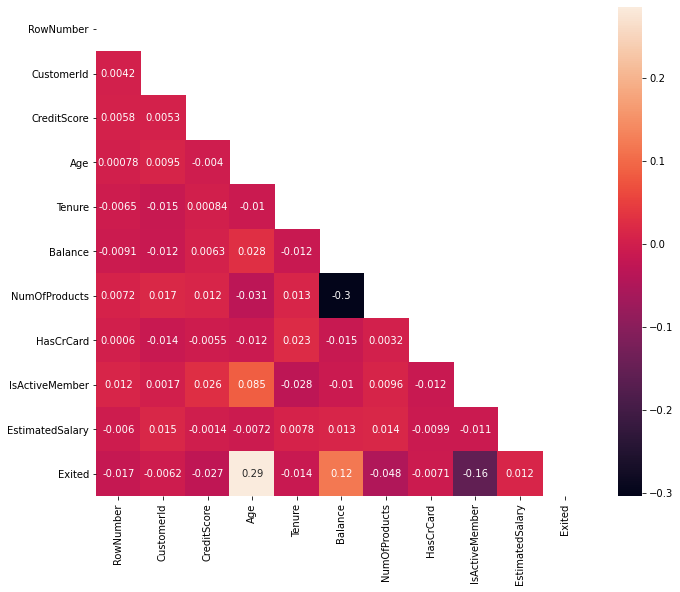

In [6]:
corr = df_churn.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(df_churn.corr(), mask=mask, annot = True);

- There are 3 numerical columns, Age,Balance and Gender whith the most correlation with the target(Exited). I will show some future engineering on these columns.
- the class 0 is not exited(stayed) and class 1 is Exited customers

### Distribution of Age vs target

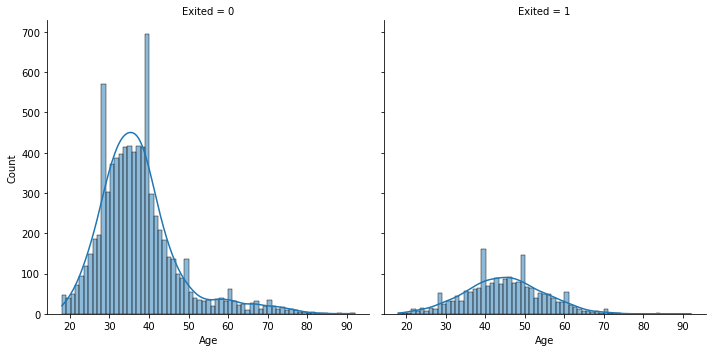

In [7]:
sns.displot(data=df_churn, x='Age', col='Exited', kde=True);

### Distribution of Balance vs target

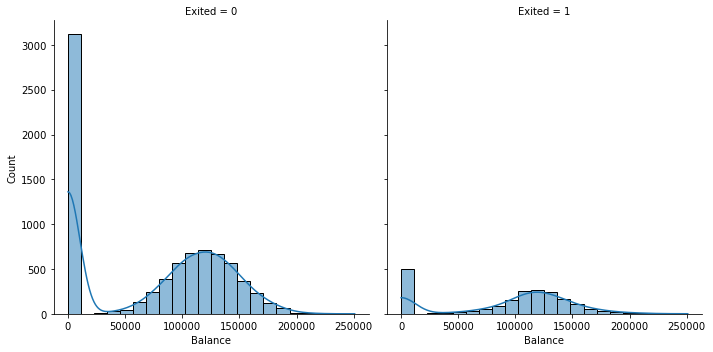

In [8]:
sns.displot(data=df_churn, x='Balance', col='Exited', kde=True);

### Number of Male and Female in dataset

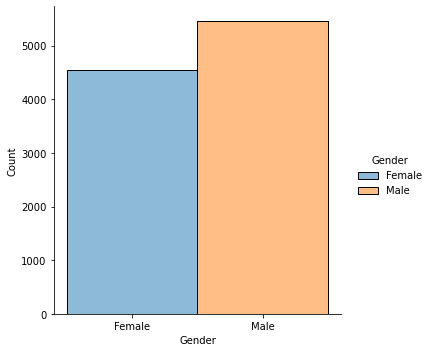

In [9]:
sns.displot(df_churn, x='Gender', hue='Gender');

### Number of customers in countries vs exited

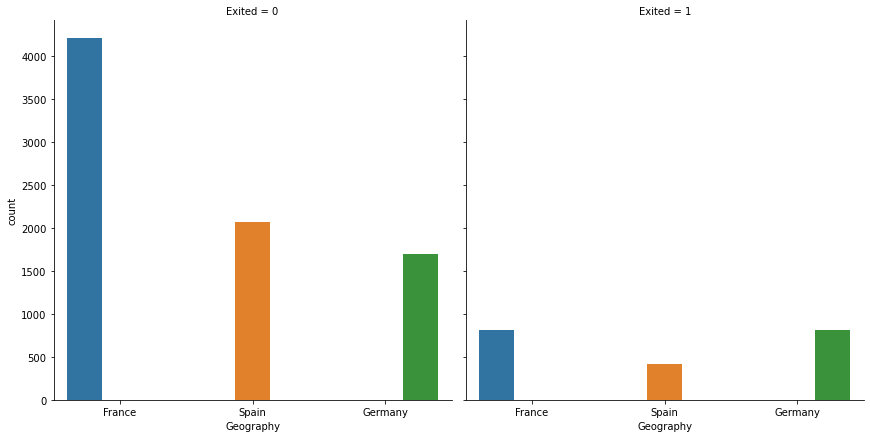

In [10]:
g = sns.catplot(x='Geography', hue='Geography', col='Exited',
                data=df_churn, kind="count",
                height=6, aspect=1);

### Number of Male=0 and Female=1

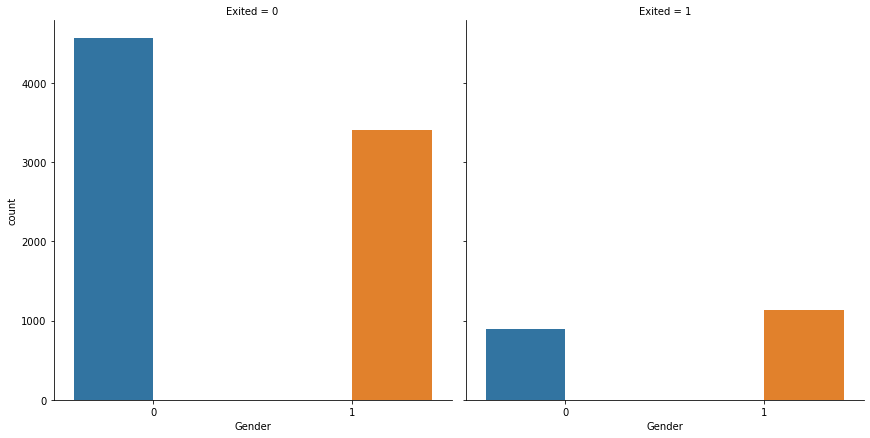

In [40]:
ge = sns.catplot(x='Gender', hue='Gender', col='Exited',
                data=df_churn, kind="count",
                height=6, aspect=1);
plt.savefig('Gender bar')

### Changing  Gender column from categorical to binary(Numerical)

In [11]:
df_churn['Gender'] = df_churn['Gender'].map({'Female': 1, 'Male': 0})
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


### Dropping Useless columns 

In [12]:
# These columns are just personal information about customers
df_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


### generate preview of entries with null values

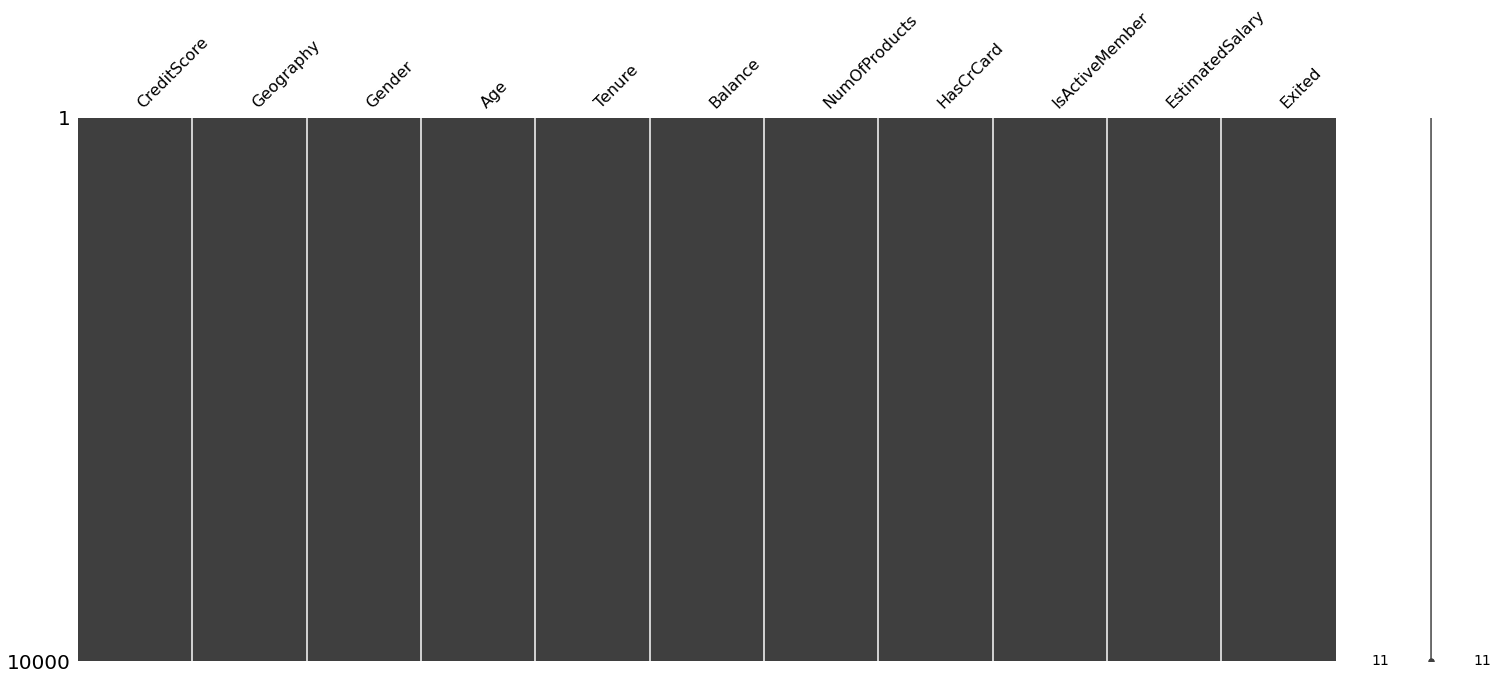


Preview of data with null values:
xxxxxxxxxxxxx
Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [13]:
if len(df_churn[df_churn.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df_churn[df_churn.isnull().any(axis=1)].head(3))
missingno.matrix(df_churn)
plt.show()
print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
print(df_churn[df_churn.isnull().any(axis=1)].head(3))

### generate count statistics of duplicate entries

In [14]:
if len(df_churn[df_churn.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df_churn[df_churn.duplicated()]))
    print(df_churn[df_churn.duplicated(keep=False)].sort_values(by=list(df_churn.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## It looks like we have Heavy Imbalance target
- I will take care of this imbalance later during one hot encoding

In [15]:
df_churn.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

/Users/alirezakarimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


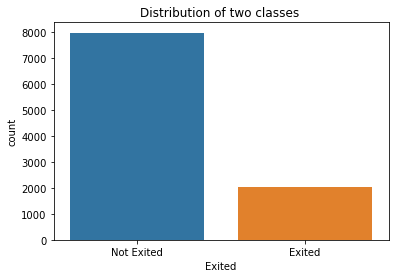

In [16]:
imbal = sns.countplot(df_churn['Exited'])
imbal.set_xticklabels(['Not Exited','Exited'])
plt.title('Distribution of two classes ')
plt.show();

### making Exited column as my target 

In [17]:
# Dropping the original Exited column from data frame
X= df_churn.drop('Exited', axis=1)
y = df_churn.Exited

In [18]:
# type of data in our dataset
X.dtypes.value_counts()

int64      7
float64    2
object     1
dtype: int64

### Split our dataset to training and test set.

In [19]:
# I do not touch the test set untill the last part 
# which is making the best training model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
print(X_train.shape)
print(y_train.shape)

(8000, 10)
(8000,)


In [20]:
# name of columns
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

### Dealing with Categorical Columns
### dropping the only object column 

In [21]:
# making dataset only numerical
X_tr_num = X_train.drop(['Geography'], axis=1)
X_tr_num

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,32,6,0.00,2,1,1,179093.26
1561,632,0,42,4,119624.60,2,1,1,195978.86
1670,559,0,24,3,114739.92,1,1,0,85891.02
6087,561,1,27,9,135637.00,1,1,0,153080.40
6669,517,0,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05
5191,682,1,58,1,0.00,1,1,1,706.50
5390,735,1,38,1,0.00,3,0,0,92220.12
860,667,0,43,8,190227.46,1,1,0,97508.04


### Using One Hot Encoder to cahnge the only object(categorical) column to binary

In [22]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiate the function

X_tr_cat = X_train[['Geography']] # use the numerical dataset

X_tr_oh = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names(X_tr_cat.columns), index=X_tr_cat.index) # create new dataset 
X_tr_ = X_tr_num.join(X_tr_oh) # join Two dataset
X_tr_

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,0,32,6,0.00,2,1,1,179093.26,1.0,0.0,0.0
1561,632,0,42,4,119624.60,2,1,1,195978.86,0.0,1.0,0.0
1670,559,0,24,3,114739.92,1,1,0,85891.02,0.0,0.0,1.0
6087,561,1,27,9,135637.00,1,1,0,153080.40,1.0,0.0,0.0
6669,517,0,56,9,142147.32,1,0,0,39488.04,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05,1.0,0.0,0.0
5191,682,1,58,1,0.00,1,1,1,706.50,1.0,0.0,0.0
5390,735,1,38,1,0.00,3,0,0,92220.12,1.0,0.0,0.0
860,667,0,43,8,190227.46,1,1,0,97508.04,1.0,0.0,0.0


### Scaling data train to avoid the power of bigger numbers.

In [23]:
ss = StandardScaler() # instantiate the function
X_train_sc = pd.DataFrame(ss.fit_transform(X_tr_), index=X_tr_.index, columns=X_tr_.columns)
X_train_sc

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,0.356500,-0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,1.001501,-0.579467,-0.576388
1561,-0.203898,-0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,-0.998501,1.725723,-0.576388
1670,-0.961472,-0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.998501,-0.579467,1.734942
6087,-0.940717,1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,1.001501,-0.579467,-0.576388
6669,-1.397337,-0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,1.001501,-0.579467,-0.576388
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.207474,-0.913248,1.435808,1.039728,-0.102301,-0.916688,0.649203,0.974817,-0.539860,1.001501,-0.579467,-0.576388
5191,0.314989,1.094993,1.816097,-1.389442,-1.218471,-0.916688,0.649203,0.974817,-1.733882,1.001501,-0.579467,-0.576388
5390,0.865009,1.094993,-0.085351,-1.389442,-1.218471,2.533560,-1.540351,-1.025834,-0.142765,1.001501,-0.579467,-0.576388
860,0.159323,-0.913248,0.390011,1.039728,1.827259,-0.916688,0.649203,-1.025834,-0.050826,1.001501,-0.579467,-0.576388


# Resampling to solve imbalance data
- using over sampling technique(Smote)

In [24]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_train_sc, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 6356, 1: 1644})
Resample dataset shape Counter({0: 6356, 1: 6356})


----

# Making pipeline
- using pipeline to make our models
- with this pipeline, I can make all models and use this pipeline to predict our test set as well.
- I use the same pipeline with all preprocessing techniques such as OneHotEncod, Scaling and resampling.
- In this pipeline I only change the Classifier algorithms to make new model

# Models
- As first simple model, I used LogisticRegresion, because it's simple, fast and easy to interpretation. The average of f1 score that I got from all LogisticRegresion was about 0.49 which is not acceptable.



- The next algorithm was DecisionTreeClassifier and the average f1 score of 0.50 
- Makes the training time of decision tree faster.
- Because of its simplicty, it's easy to code, visualize, interpret, and manipulate simple decision tree.
- Decision tree follows a non-parametric methods.
- Can work on both caregorical and numerical data.





- For the next model, I used RandomForestClassifier. The f1 score from this model was between 0.59 to 0.62
- I use Random Forest, because it creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance.
- Random Forest works well with both categorical and numerical variables.



- The last algorithm was XGBClassifier with the average f1 score of 0.60
- Although I got good score out of Random Forest model, it was slow to run train set.
- I use XGBoost to see if I get better or the same score in better computational speed.
- XGBoost has in-built L1 (Lasso Regression) and L2 (Ridge Regression) regularization which prevents the model from overfitting.
- XGBoost allows user to run a cross-validation at each iteration of the boosting process.



- Although Random forest does not have the best computational speed and it takes more time to run compare to other models, it gave me the best f1 score.
- I use Random Forest model with Grid Search as my best model.

In [25]:
# using pipiline to make Random Forest model with hyper tuning 
pip_line_rf1 = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder
         (sparse=False, handle_unknown='ignore'),
         ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('rf1', RandomForestClassifier
     (criterion='gini', random_state=42,class_weight='balanced' ))
])

In [26]:
# fitting model(pipeline) into train set
pip_line_rf1.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('rf1',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [27]:
# getting the average of f1 score
cross_val_score(pip_line_rf1, X_train, y_train, cv=3, scoring='f1').mean()

0.6017686728771269

In [28]:
# checking the accuracy score
cross_val_score(pip_line_rf1, X_train, y_train, cv=3, scoring='accuracy')

array([0.85564304, 0.85714286, 0.84996249])

In [29]:
# using Grid Search function to Hyper-tun Parameters
param_grid = { 'rf1__criterion': ['gini', 'entropy'],'rf1__max_depth': [2,5,10],'rf1__n_estimators': [100, 1000]}

grid_search_rf =GridSearchCV(pip_line_rf1,param_grid=param_grid,cv=3, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train,y_train)# fiiting model into training set

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Geography_ohe',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoding',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('sampling',
                                        RandomOverSampler(random_state=42)),
                                       ('rf1',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
   

In [30]:
# getting the best estimator
grid_search_rf.best_estimator_

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('rf1',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=1000, random_state=42))])

In [31]:
# getting the best score 
grid_search_rf.best_score_

0.6179687984707218

In [32]:
# predicting the f1 score 
f1_score(y_train, grid_search_rf.best_estimator_.predict(X_train))

0.7843137254901962

In [33]:
# using helper function to predict 
model_output(grid_search_rf, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.6174563801157579
The test Accuracy is: 0.8355
[[1392  215]
 [ 114  279]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.56      0.71      0.63       393

    accuracy                           0.84      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [34]:
# make prediction on test set
grid_search_rf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [35]:
# using the predict of test set
y_hat_test = grid_search_rf.predict(X_test)

In [36]:
# getting the f1 score on test set
f1_score(y_test, y_hat_test)

0.629086809470124

In [37]:
accuracy_score(y_test, y_hat_test)

0.8355

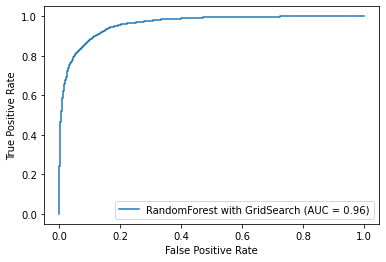

In [38]:
plot_roc_curve(grid_search_rf, X_train, y_train, name='RandomForest with GridSearch');

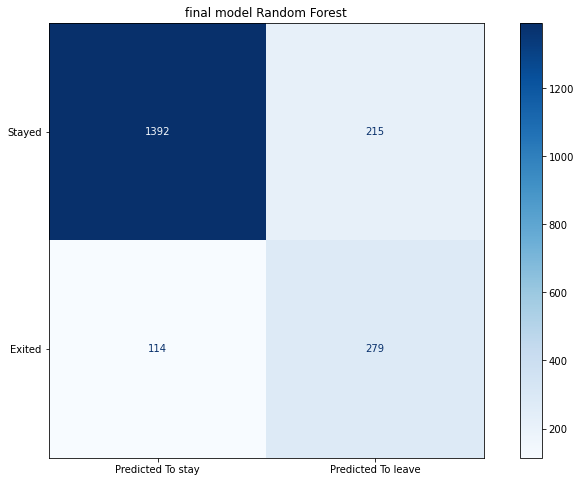

In [39]:
confusion_matrix_info(grid_search_rf, X_test, y_test,'final model Random Forest');

I was be able to get predictions on test set without touching the test set by just using the pipeline that I made it before. 

## Next step and recommendations

# To improve my model and better score:


 Extra data before churn 
- Number of customer service call 
- Number of in-person customers in bank
- Mkae survey frequently 


 Extra data after churn 
- who they talked to for the last time
- who they visited for the last time  
